## **STEP#1 Raw Data Preprocessing**

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import os
import natsort
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Dir = r'D:\NMDL\졸업논문\raw_data'
folder_list = natsort.natsorted(os.listdir(Dir))

In [4]:
# preprocessing
for k in range(len(folder_list)):
    path = Dir + '/' + folder_list[k]
    file_list = natsort.natsorted(os.listdir(path)) # 경로내 file list 추출

    for i in range(len(file_list)):
        f = open(path + '/' + file_list[i],'r') # 각 file 의 내용 readlines 로 read
        lines = f.readlines()
        f.close()

        initialDataLine = 1     # Data 가 시작되는 행 number 추출용
        for j in range(len(lines)):
            if lines[j] == 'VD\tID\tVG\tIG\tACCSTRESS\n' or lines[j] == 'VD\tID\tVG\tIG\t\n':    # 해당 문구 다음 행부터 실제 data, @@@ 문구 바뀔 수도 있음
                break
            else:
                initialDataLine = initialDataLine + 1

        finalDataLine = initialDataLine     # Data 끝나는 행 number 추출용
        for j in range(len(lines[initialDataLine:])) :
            if lines[j+initialDataLine] == '\n':    # 해당 문구 \n 직전까지가 data에 해당
                break
            else :
                finalDataLine = finalDataLine + 1    
        dataStr = lines[initialDataLine:finalDataLine]  # initialDataLine 부터 finalDataLine 까지 읽어들임

        # folder_data.extend(dataStr) # 폴더 데이터 리스트에 현재 파일의 데이터를 추가

        for l in range(len(dataStr)) :
            appendData = list(map(float, dataStr[l].split('\t')[:4]))
            if l == 0 :
                data = appendData
            else :
                data = np.concatenate((data, appendData), axis=0)
                
        data = np.reshape(data, [-1, 4])

        if i == 0:
            dataset = data
        else:
            dataset = np.concatenate((dataset, data), axis=0)
            
    # dataset 변수에 각  DAT file 의 data 추가
    dataset = np.reshape(dataset, [len(file_list), int(dataset.shape[0]/len(file_list)), 4])

    # dataset1 변수에 각 folder 별 전체 DAT file dataset 추가 
    if k == 0 :
        dataset_total = dataset
    else :
        dataset_total = np.concatenate((dataset_total, dataset), axis=0)

In [5]:
# raw dataset npz 저장
np.savez(r'D:\NMDL\졸업논문\KMeans\dataset_(20240520_종합)', dataset = dataset_total)

In [6]:
dataset_total.shape

(966, 301, 4)

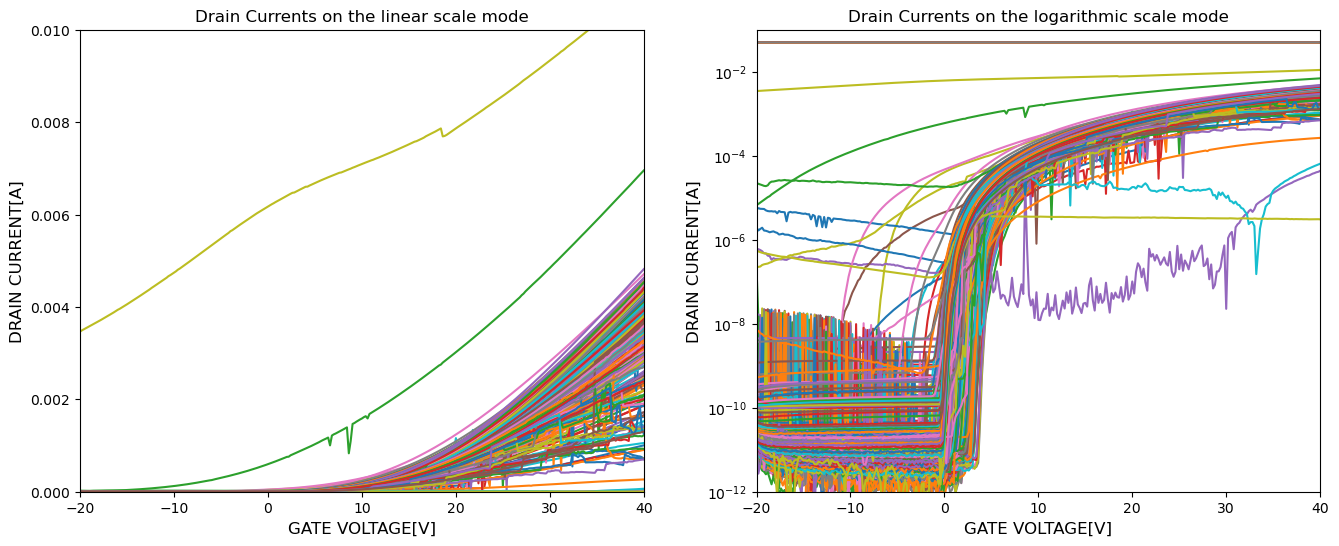

In [7]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].set_title('Drain Currents on the linear scale mode')
ax[0].set_xlabel('GATE VOLTAGE[V]', fontsize=12)
ax[0].set_ylabel('DRAIN CURRENT[A]', fontsize=12)
ax[0].set_xlim([-20, 40])
ax[0].set_ylim([0, 0.01])

ax[1].set_title('Drain Currents on the logarithmic scale mode')
ax[1].set_xlabel('GATE VOLTAGE[V]', fontsize=12)
ax[1].set_ylabel('DRAIN CURRENT[A]', fontsize=12)
ax[1].set_xlim([-20, 40])
ax[1].set_ylim([1e-12, 1e-1])

x = np.arange(-20, 40.2, 0.2)
for l in range(dataset_total.shape[0]) :
    y = abs(dataset_total[l,:,1])
    ax[0].plot(x, y)
    ax[1].plot(x, y)
    ax[1].set_yscale('log')